In [5]:
import sklearn.datasets
import pandas as pd
import numpy as np
import umap
import umap.plot
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE, Isomap

In [6]:
data = pd.read_csv("world_data/rawdata_world_3d.csv")
print(f"data shape: {data.shape}")
y = data["y"]

data.drop(["y"], axis=1, inplace=True)

data shape: (2527, 4)


In [7]:
def draw_umap(n_neighbors=15, min_dist=0.1, n_components=2, metric='euclidean', title=''):
    fit = umap.UMAP(
        n_neighbors=n_neighbors,
        min_dist=min_dist,
        n_components=n_components,
        metric=metric
    )
    u = fit.fit_transform(data);
    fig = plt.figure()
    if n_components == 1:
        ax = fig.add_subplot(111)
        ax.scatter(u[:,0], range(len(u)), c=y)
    if n_components == 2:
        ax = fig.add_subplot(111)
        ax.scatter(u[:,0], u[:,1], c=y)
    if n_components == 3:
        ax = fig.add_subplot(111, projection='3d')
        ax.scatter(u[:,0], u[:,1], u[:,2], c=data, s=100)
    plt.title(title, fontsize=18)

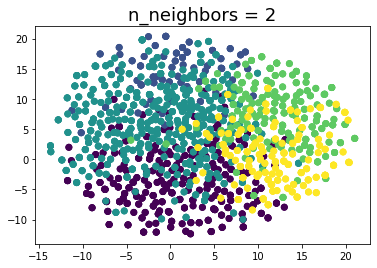

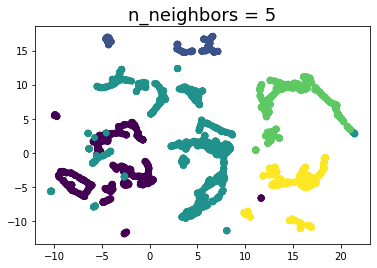

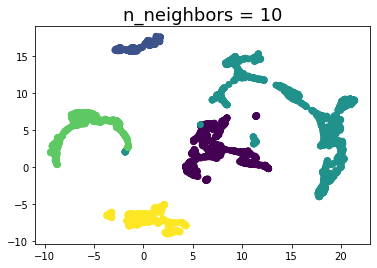

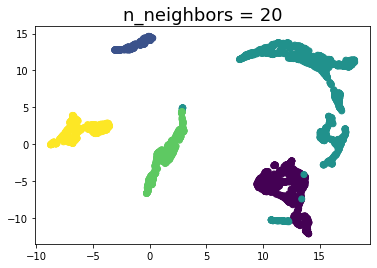

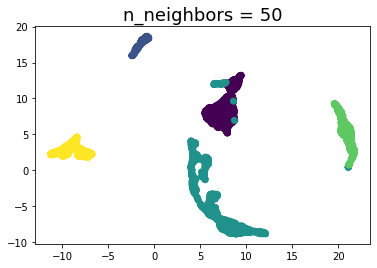

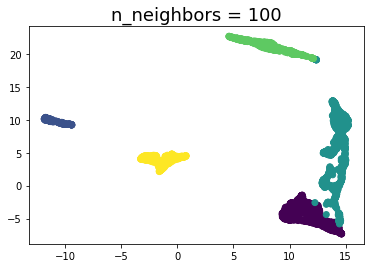

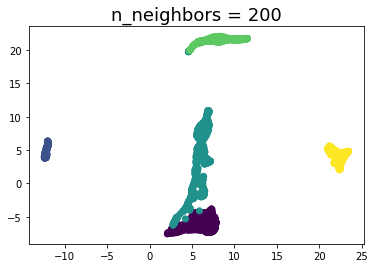

In [8]:
for n in (2, 5, 10, 20, 50, 100, 200):
    draw_umap(n_neighbors=n, title='n_neighbors = {}'.format(n))

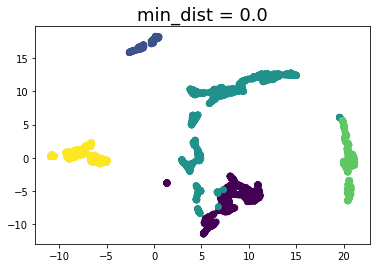

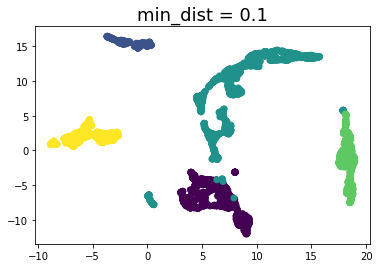

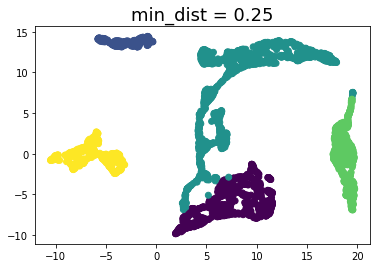

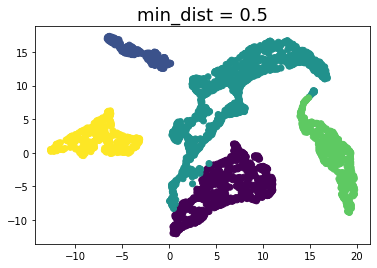

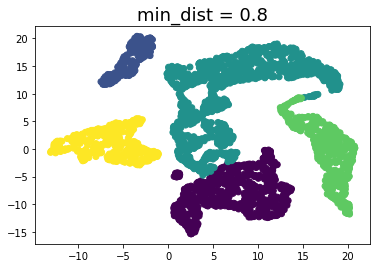

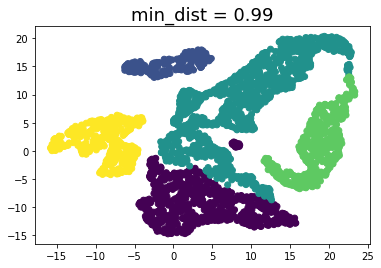

In [9]:
for d in (0.0, 0.1, 0.25, 0.5, 0.8, 0.99):
    draw_umap(min_dist=d, title='min_dist = {}'.format(d))


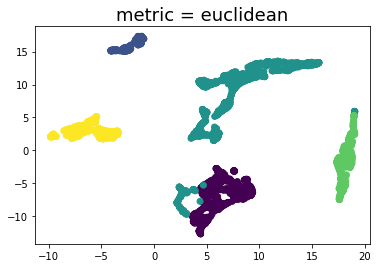

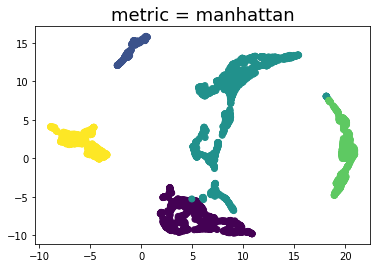

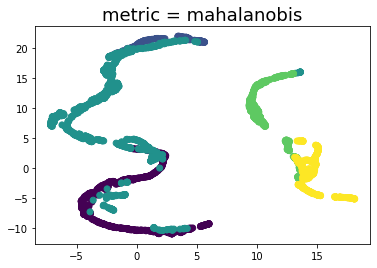

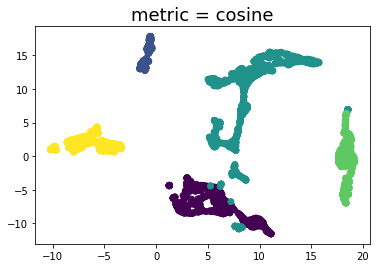

In [10]:
for m in ("euclidean", "manhattan", "mahalanobis", "cosine"):
    name = m if type(m) is str else m.__name__
    draw_umap(n_components=2, metric=m, title='metric = {}'.format(name))

In [11]:
reducer = umap.UMAP(n_neighbors=20, n_components=2)
mapper = reducer.fit(data)

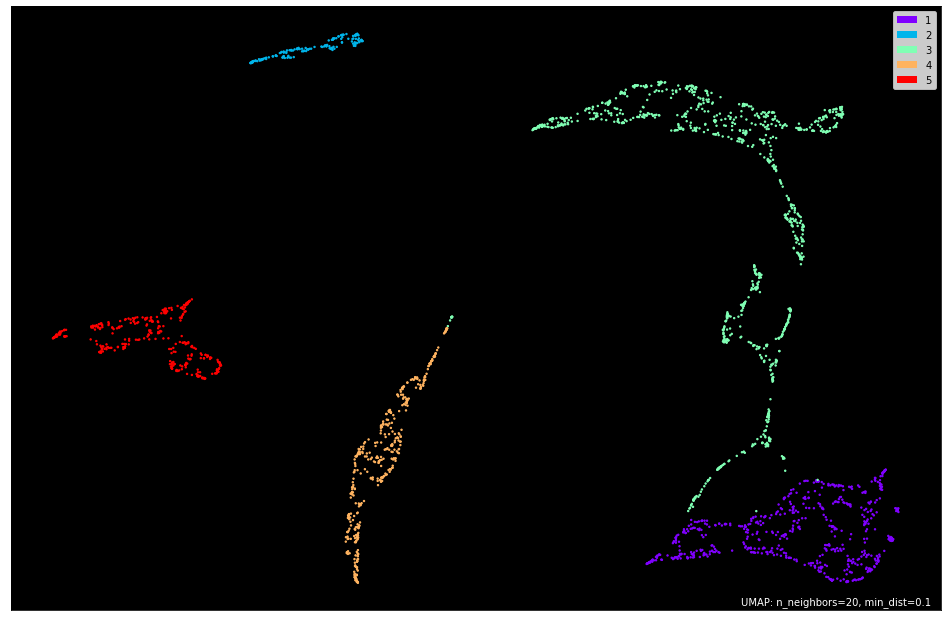

In [12]:
umap.plot.points(mapper, labels=y, theme='fire', width=1200, height=800)


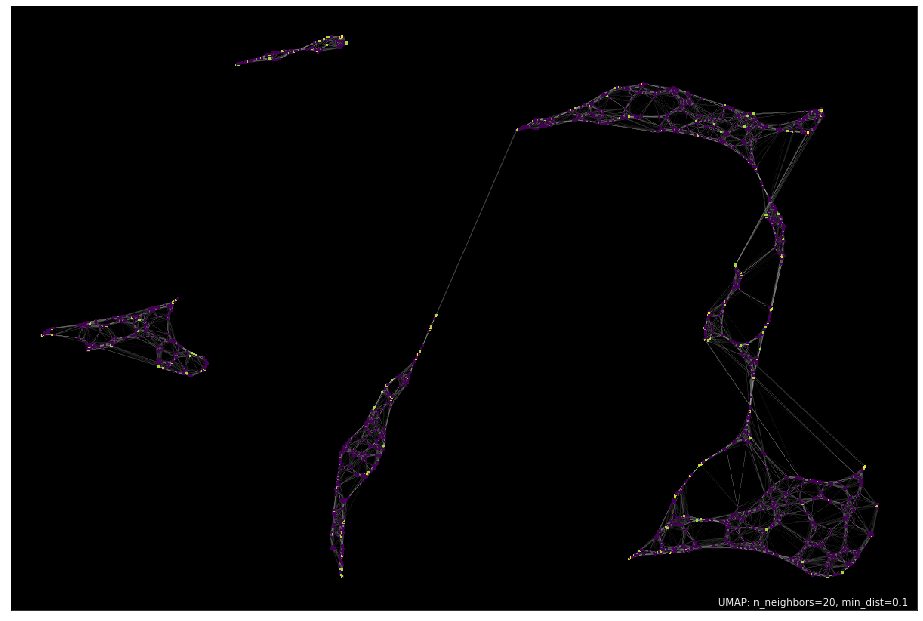

In [13]:
umap.plot.connectivity(mapper, show_points=True, theme="viridis", width=1200, height=800)

In [33]:
p = umap.plot.interactive(mapper, labels=y, point_size=4, theme="inferno", width=1600, height=1200)
umap.plot.show(p)

In [16]:
pendigits = sklearn.datasets.load_digits()

In [39]:
def plot_embedding_2d(X, Y, title, plot_name):
    fig = plt.figure()
    ax = fig.add_subplot(111)
    scatter = ax.scatter(X[:, 0], X[:, 1], c=Y, cmap=plt.cm.Spectral)
    legend = ax.legend(*scatter.legend_elements(), bbox_to_anchor=(1.05, 1), loc="best")
    ax.add_artist(legend)
    plt.title(f'2d {title}')
    plt.savefig(f'output/{plot_name}_2d.png', dpi=300)

In [42]:
X_tsne = TSNE().fit_transform(pendigits.data)
X_tsne.shape

(1797, 2)

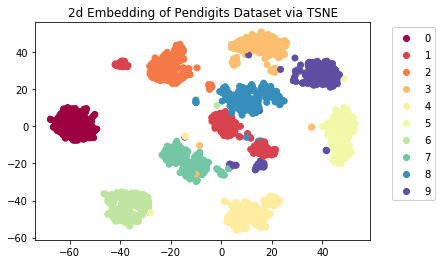

In [43]:
plot_embedding_2d(X=X_tsne, Y=pendigits.target, title="Embedding of Pendigits Dataset via TSNE", plot_name="tsne_pendigits")

In [46]:
X_umap = umap.UMAP().fit_transform(pendigits.data)

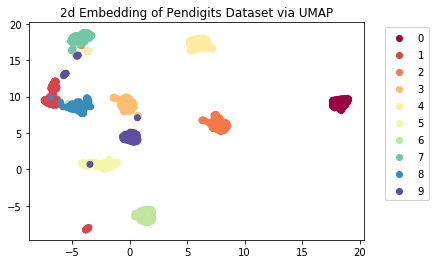

In [47]:
plot_embedding_2d(X=X_umap, Y=pendigits.target, title="Embedding of Pendigits Dataset via UMAP", plot_name="umap_pendigits")

In [29]:
X_isomap = Isomap(n_neighbors=15).fit_transform(pendigits.data)

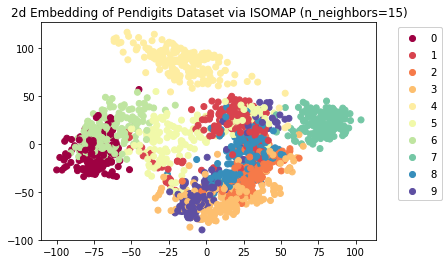

In [38]:
plot_embedding_2d(X=X_isomap, Y=pendigits.target, title="Embedding of Pendigits Dataset via ISOMAP (n_neighbors=15)", plot_name="isomap_pendigits")